In [1]:
import tensorflow as tf

import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
warnings.filterwarnings('ignore')

import IPython
import IPython.display

import os
import math
import datetime
import scipy as sp
import numpy as np
import pandas as pd 
pd.set_option('display.max_rows', 200)
pd.set_option('display.max_columns', 200)
import matplotlib as mpl
import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams['figure.dpi'] = 200
plt.rcParams['savefig.dpi'] = 200
plt.rcParams['figure.figsize'] = (10, 5)
import seaborn as sns 
sns.set(rc={"figure.dpi":200, 'savefig.dpi':200 , 'figure.figsize': (10, 5)})
sns.set_context('notebook')
sns.set_style("ticks")

sns.set_style('darkgrid')

from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.stattools import kpss
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.statespace.sarimax import SARIMAX
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.graphics.tsaplots import plot_pacf
import statsmodels.api as sm

from pmdarima import auto_arima

import sklearn as skl
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error

# Training

In [2]:
# Loading Y training data for A:
train_a = pd.read_excel('data_cleaned/A/train_a.xlsx')
# Setting DatetimeIndex:
# train_a = train_a.set_index("time")

# Loading X training data for A:
X_train_a = pd.read_excel('data_cleaned/A/X_train_a.xlsx')
# Setting DatetimeIndex:
# X_train_a = X_train_a.set_index("time")

# Loading X testing data for A:
X_test_a = pd.read_excel('data_cleaned/A/X_test_a.xlsx')
# Setting DatetimeIndex:
# X_test_a = X_test_a.set_index("time")

# Loading Y training data for B:
train_b = pd.read_excel('data_cleaned/B/train_b.xlsx')
# Setting DatetimeIndex:
# train_b = train_b.set_index("time")

# Loading X training data for B:
X_train_b = pd.read_excel('data_cleaned/B/X_train_b.xlsx')
# Setting DatetimeIndex:
# X_train_b = X_train_b.set_index("time")

# Loading X testing data for B:
X_test_b = pd.read_excel('data_cleaned/B/X_test_b.xlsx')
# Setting DatetimeIndex:
# X_test_b = X_test_b.set_index("time")

# Loading Y training data for C:
train_c = pd.read_excel('data_cleaned/C/train_c.xlsx')
# Setting DatetimeIndex:
# train_c = train_c.set_index("time")

# Loading X training data for A:
X_train_c = pd.read_excel('data_cleaned/C/X_train_c.xlsx')
# Setting DatetimeIndex:
# X_train_c = X_train_c.set_index("time")

# Loading X testing data for A:
X_test_c = pd.read_excel('data_cleaned/C/X_test_c.xlsx')
# Setting DatetimeIndex:
# X_test_c = X_test_c.set_index("time")

(array([295., 121., 137.,  99.,  89.,  58.,  62.,  63.,  39.,  37.]),
 array([ 0.        ,  7.2396685 , 14.479337  , 21.7190055 , 28.958674  ,
        36.1983425 , 43.438011  , 50.6776795 , 57.91734801, 65.15701651,
        72.39668501]),
 <BarContainer object of 10 artists>)

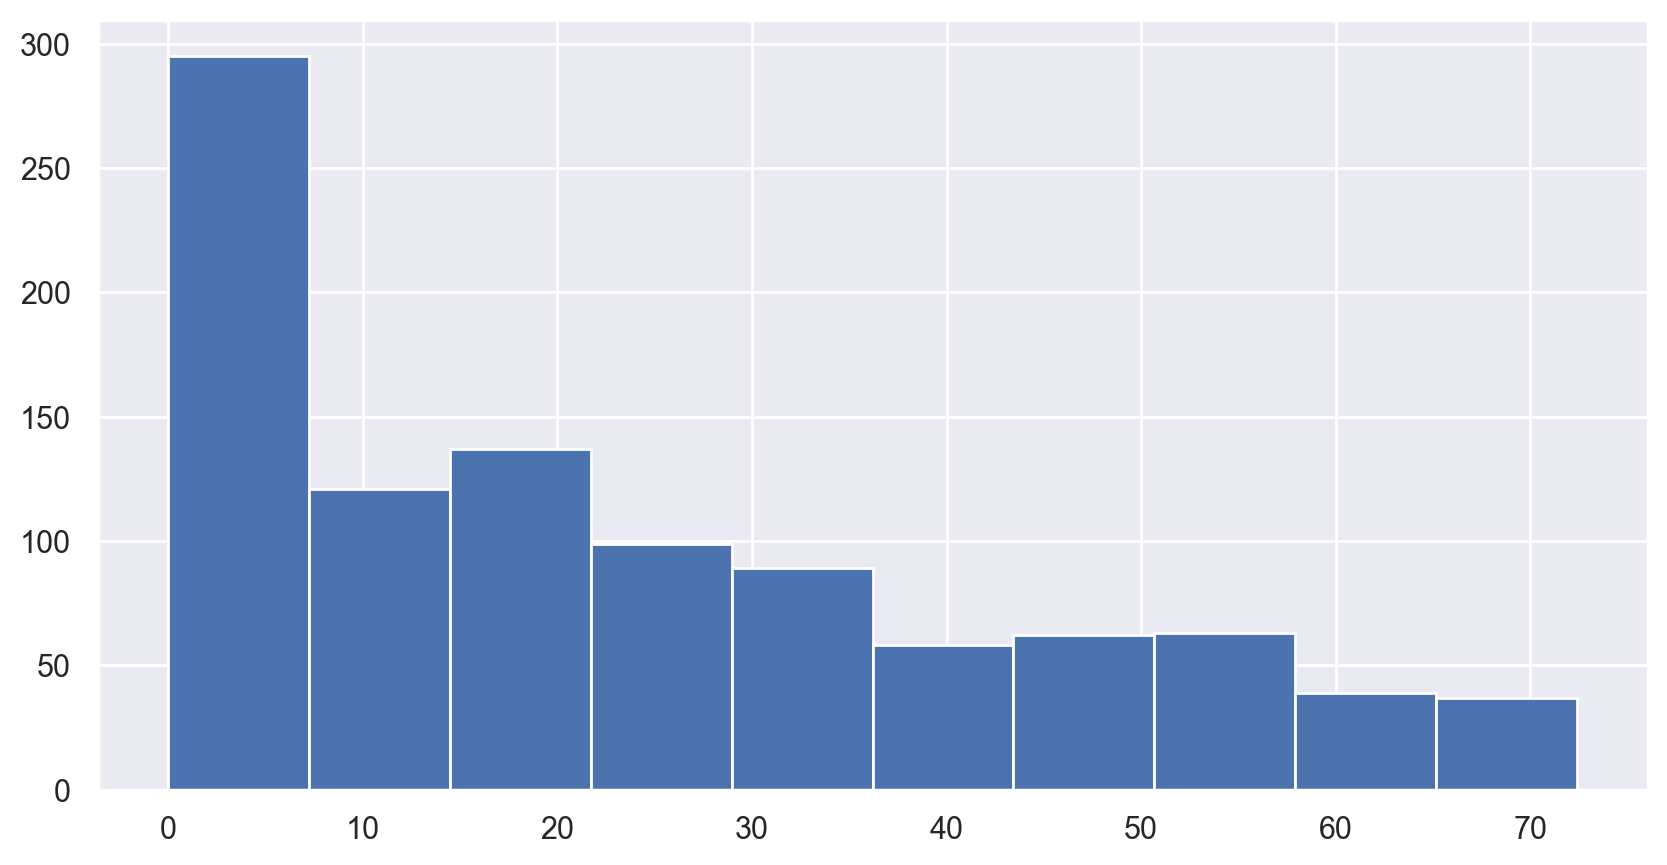

In [22]:
plt.hist(np.sqrt(train_a.iloc[:1000,1]))

In [5]:
len_pval_a = len(X_train_a.columns[1:])
train_a_red = train_a["pv_measurement"].reset_index(drop=True)
columns_to_include_a = X_train_a.columns[1:]
while (len_pval_a != 0):
    X_train_a_red = X_train_a[columns_to_include_a].reset_index(drop=True)
    model_a = SARIMAX(endog = train_a_red, exog = X_train_a_red)
    model_a_fit = model_a.fit()
    pval_a = model_a_fit.pvalues
    pval_a = pval_a[:(len(pval_a) - 2)]
    pval_a_index_remove = pval_a[pval_a > 0.05].index
    len_pval_a = len(pval_a_index_remove)
    if len_pval_a >= 1: 
        columns_to_include_a = columns_to_include_a.drop(columns_to_include_a[columns_to_include_a.get_indexer(pval_a_index_remove)])
        if len_pval_a == 0:
            columns_to_include_a = columns_to_include_a.drop(columns_to_include_a[columns_to_include_a.get_loc(pval_a_index_remove)])

In [6]:
columns_to_include_a

Index(['absolute_humidity_2m__gm3', 'air_density_2m__kgm3', 'clear_sky_rad__W',
       'dew_point_2m__K', 'diffuse_rad__W', 'diffuse_rad_1h__J',
       'direct_rad__W', 'direct_rad_1h__J', 'effective_cloud_cover__p',
       'elevation__m', 'msl_pressure__hPa', 'precip_5min__mm',
       'precip_type_5min__idx', 'pressure_100m__hPa', 'sfc_pressure__hPa',
       'snow_drift__idx', 'snow_melt_10min__mm',
       'super_cooled_liquid_water__kgm2', 't_1000hPa__K', 'wind_speed_10m__ms',
       'wind_speed_u_10m__ms', 'wind_speed_v_10m__ms',
       'wind_speed_w_1000hPa__ms'],
      dtype='object')

In [3]:
train_a_train = train_a.iloc[:33341,[1]]
train_a_test = train_a.iloc[33341:,[1]]
X_train_a_train = X_train_a.iloc[:33341,1:]
X_train_a_test = X_train_a.iloc[33341:,1:]

In [4]:
for p in range(3):
    for d in range(1):
        for q in range(3):
            order = (p,d,q)
            model = SARIMAX(train_a_train, order = order, exog = X_train_a_train)
            model_fit = model.fit(disp = 0)
            pred_y = model_fit.forecast(len(X_train_a_test), exog = X_train_a_test)
            error = mean_absolute_error(train_a_test, pred_y)
            print(order, error)

(0, 0, 0) 350.3195750521631


c:\Users\olara\anaconda3\envs\tf\lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


(0, 0, 1) 354.17284064044287
(0, 0, 2) 360.8630797235803
(1, 0, 0) 376.44614385261536
(1, 0, 1) 375.1587287899485
(1, 0, 2) 375.0644578252937
(2, 0, 0) 375.19392808933696
(2, 0, 1) 375.1236417812858
(2, 0, 2) 350.3205933867005


In [5]:
sarimax_model_a = SARIMAX(train_a_train["pv_measurement"], order = (3,0,1), exog = X_train_a_train[columns_to_include_a])
res_a = sarimax_model_a.fit(disp = False)
res_a_forecast = res_a.forecast(len(X_train_a_test), exog = X_train_a_test[columns_to_include_a])
mean_absolute_error(train_a_test["pv_measurement"],res_a_forecast)

375.585985825498

In [6]:
n_p, n_d, n_q = range(1),range(1),range(1)

In [7]:
for p in n_p:
    for d in n_d:
        for q in n_q:
            order = (p,d,q)
            pred_s = list()
            for i in range(len(X_train_a_test)):
                try:
                    print(i)
                    model = SARIMAX(train_a_train, order = order, exog = X_train_a_train)
                    model_fit = model.fit(disp = 0)
                    pred_y = model_fit.forecast(exog = X_train_a_test)[0]
                    pred_s.append(pred_y)
                    error = mean_absolute_error(train_a_test, pred_s)
                    print("SARIMAX%s MAE = %.2f"% (order, error))
                except:
                    continue

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138


In [72]:
res_a.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:         pv_measurement   No. Observations:                33341
Model:               SARIMAX(1, 0, 0)   Log Likelihood             -242919.417
Date:                Mon, 02 Oct 2023   AIC                         485926.834
Time:                        19:48:42   BIC                         486297.074
Sample:                             0   HQIC                        486045.036
                              - 33341                                         
Covariance Type:                  opg                                         
===================================================================================================
                                      coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------------------
absolute_humidity_2m__gm3         -71.7661      5.891    -12.183      0.000     -83.312     -60.220
air_density_2m__kgm3            -8843.4554      0.723  -1.22e+04      0.000   -8844.873   -8842.038
clear_sky_energy_1h__J          -4.571e-05   7.33e-05     -0.624      0.533      -0.000    9.79e-05
clear_sky_rad__W                    1.5602      0.313      4.983      0.000       0.947       2.174
dew_or_rime__idx                   52.2790     72.255      0.724      0.469     -89.339     193.897
dew_point_2m__K                    31.2879      8.379      3.734      0.000      14.866      47.710
diffuse_rad__W                      5.3613      0.161     33.403      0.000       5.047       5.676
diffuse_rad_1h__J                  -0.0006   5.66e-05    -11.360      0.000      -0.001      -0.001
direct_rad__W                       7.3292      0.069    106.527      0.000       7.194       7.464
direct_rad_1h__J                   -0.0007   2.41e-05    -30.390      0.000      -0.001      -0.001
effective_cloud_cover__p           -1.6958      0.414     -4.097      0.000      -2.507      -0.885
elevation__m                      -54.1719      4.095    -13.230      0.000     -62.198     -46.146
fresh_snow_12h__cm                 -4.5123     21.949     -0.206      0.837     -47.532      38.508
fresh_snow_1h__cm                 101.8202     21.428      4.752      0.000      59.822     143.818
fresh_snow_24h__cm                -10.1131     13.458     -0.751      0.452     -36.491      16.265
fresh_snow_3h__cm                  13.6409     53.176      0.257      0.798     -90.582     117.864
fresh_snow_6h__cm                  -2.4492     43.531     -0.056      0.955     -87.769      82.870
is_day__idx                       -37.3126     48.375     -0.771      0.441    -132.125      57.500
is_in_shadow__idx                 -37.2980     30.986     -1.204      0.229     -98.029      23.433
msl_pressure__hPa                 290.7923     42.684      6.813      0.000     207.133     374.452
precip_5min__mm                  -295.8661      1.944   -152.182      0.000    -299.677    -292.056
precip_type_5min__idx             -66.8561      9.825     -6.805      0.000     -86.112     -47.600
pressure_100m__hPa               -573.3329     20.988    -27.318      0.000    -614.468    -532.198
pressure_50m__hPa                -153.8309     14.465    -10.635      0.000    -182.181    -125.481
prob_rime__p                        1.1358      4.851      0.234      0.815      -8.371      10.643
rain_water__kgm2                   63.1883      3.863     16.356      0.000      55.616      70.760
relative_humidity_1000hPa__p       -1.4002      1.503     -0.931      0.352      -4.347       1.547
sfc_pressure__hPa                 438.6607      8.077     54.309      0.000     422.830     454.491
snow_depth__cm                     -1.2085     28.899     -0.042      0.967     -57.850      55.433
snow_drift__idx                 -1.467e-1

In [37]:
mod1 = SARIMAX(endog = train_a_train, exog = X_train_a_train[columns_to_include_a], order = (1,0,0))
mod1_fit = mod1.fit()

c:\Users\Ola\anaconda3\envs\tf\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\Ola\anaconda3\envs\tf\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


In [40]:
predtest = mod1_fit.predict(start = 0, end = len(X_train_a_test)-1, typ="levels", exog = X_train_a_test[columns_to_include_a])
predtest.index = X_train_a_test.index
predtest[predtest < 0] = 0

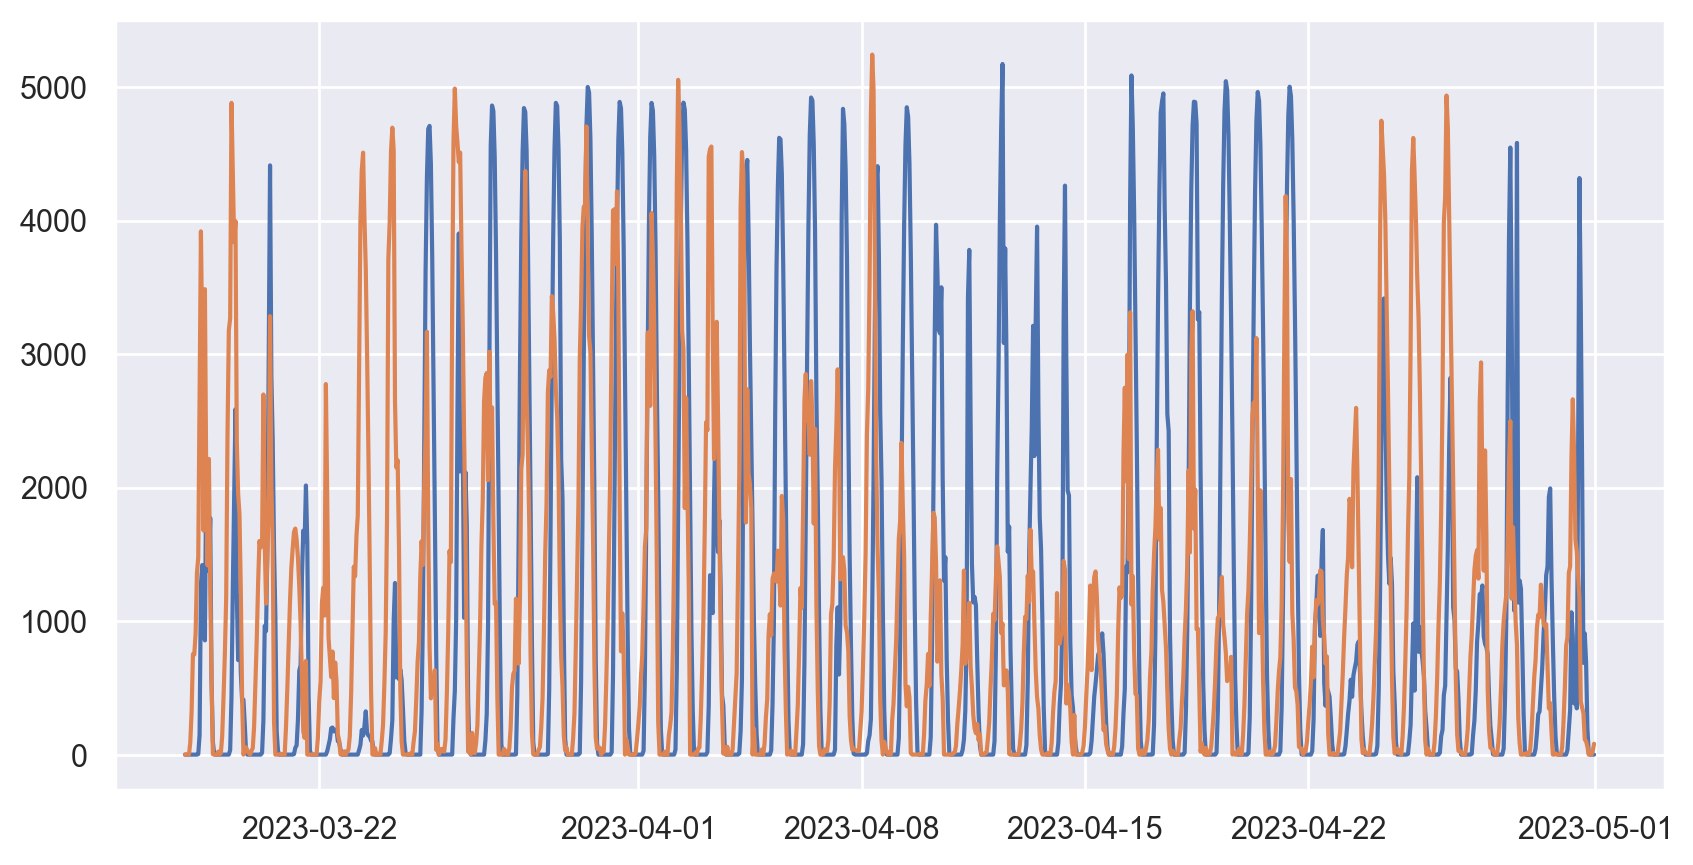

In [41]:
plt.plot(train_a_test)
plt.plot(predtest)
plt.show()

In [84]:
print(mod1_fit.get_forecast(720, exog = X_test_a))

c:\Users\Ola\anaconda3\envs\tf\lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(


In [83]:
mod2 = SARIMAX(endog = train_b["pv_measurement"], order = (3,0,2))
mod2_fit = mod2.fit()

c:\Users\Ola\anaconda3\envs\tf\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\Ola\anaconda3\envs\tf\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


In [44]:
mod3 = SARIMAX(endog = train_c["pv_measurement"], order = (3,0,2))
mod3_fit = mod3.fit()

c:\Users\Ola\anaconda3\envs\tf\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\Ola\anaconda3\envs\tf\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


In [45]:
print(mod1_fit.params)
print(mod2_fit.params)
print(mod3_fit.params)

ar.L1          2.864576
ar.L2         -2.796090
ar.L3          0.931418
ma.L1         -1.852520
ma.L2          0.867246
sigma2    163574.784693
dtype: float64
ar.L1        2.289962
ar.L2       -1.813646
ar.L3        0.497149
ma.L1       -1.121216
ma.L2        0.450144
sigma2    3619.345780
dtype: float64
ar.L1        2.210234
ar.L2       -1.694542
ar.L3        0.449792
ma.L1       -1.080185
ma.L2        0.481178
sigma2    2703.640569
dtype: float64


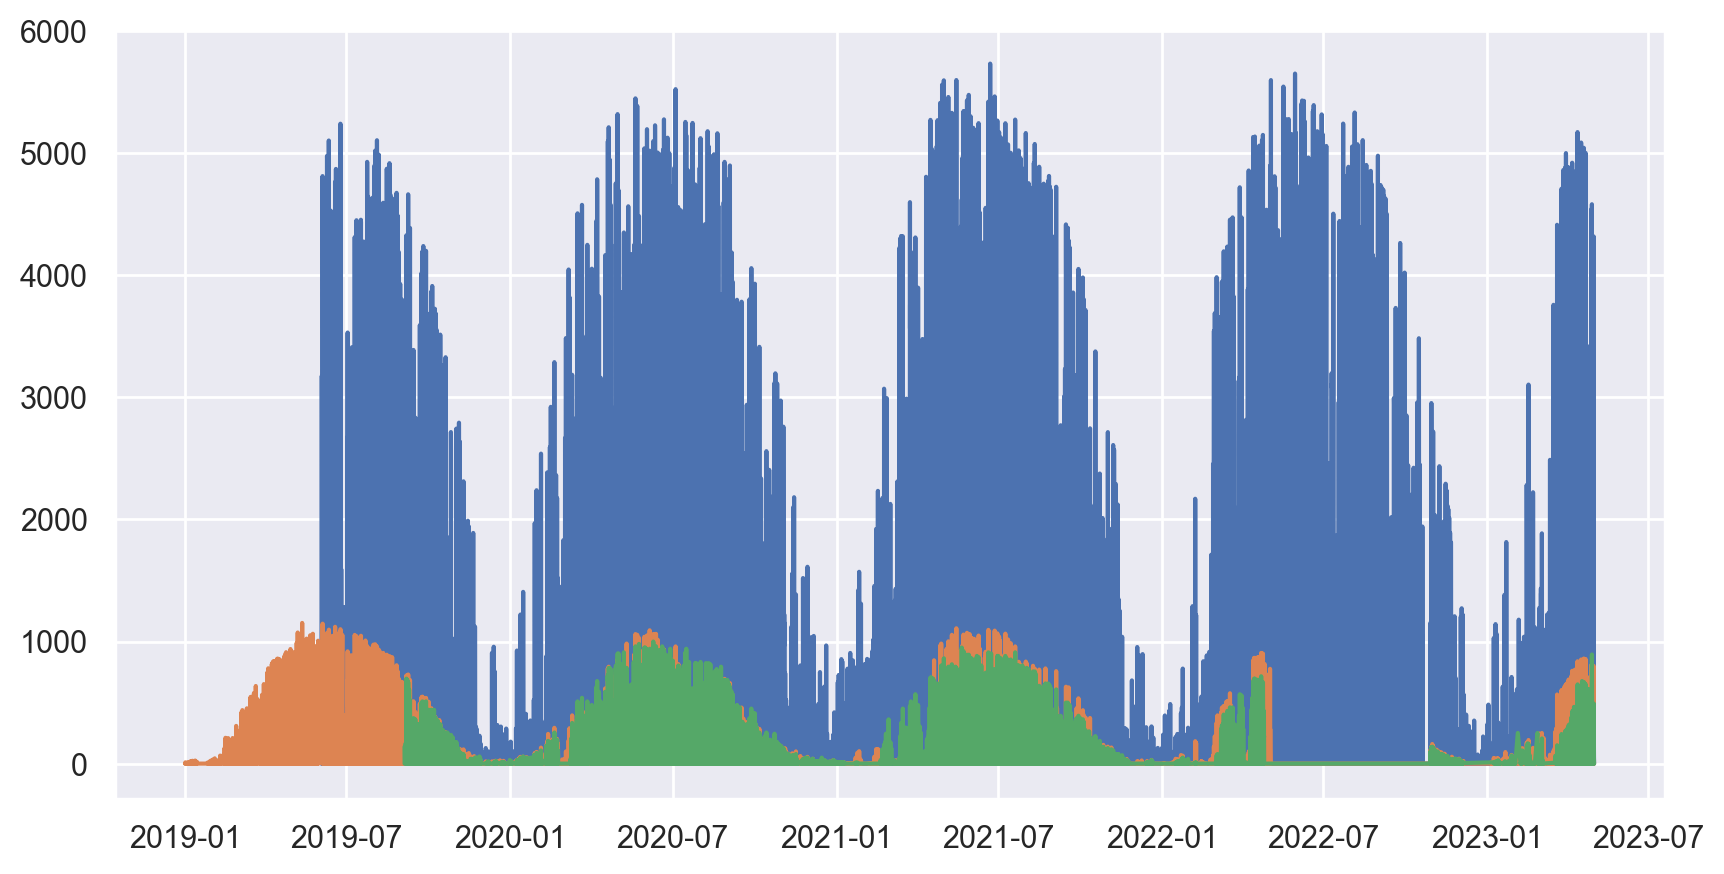

In [47]:
plt.plot(train_a)
plt.plot(train_b)
plt.plot(train_c)
plt.show()

c:\Users\Ola\anaconda3\envs\tf\lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(


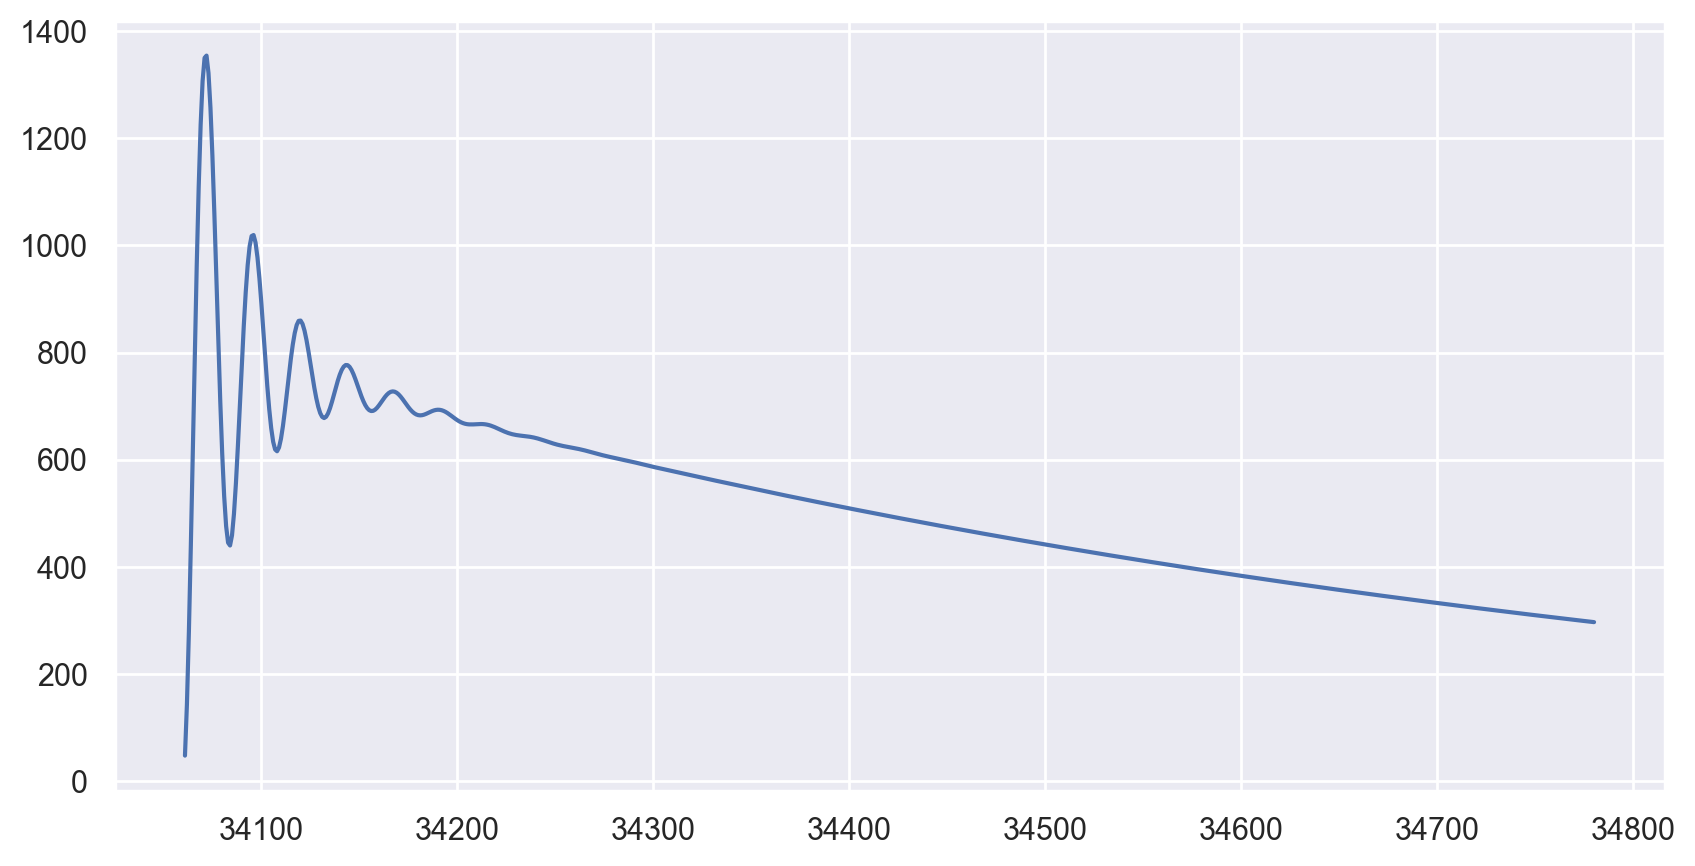

In [65]:
plt.plot(mod1_fit.forecast(720))

c:\Users\Ola\anaconda3\envs\tf\lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(


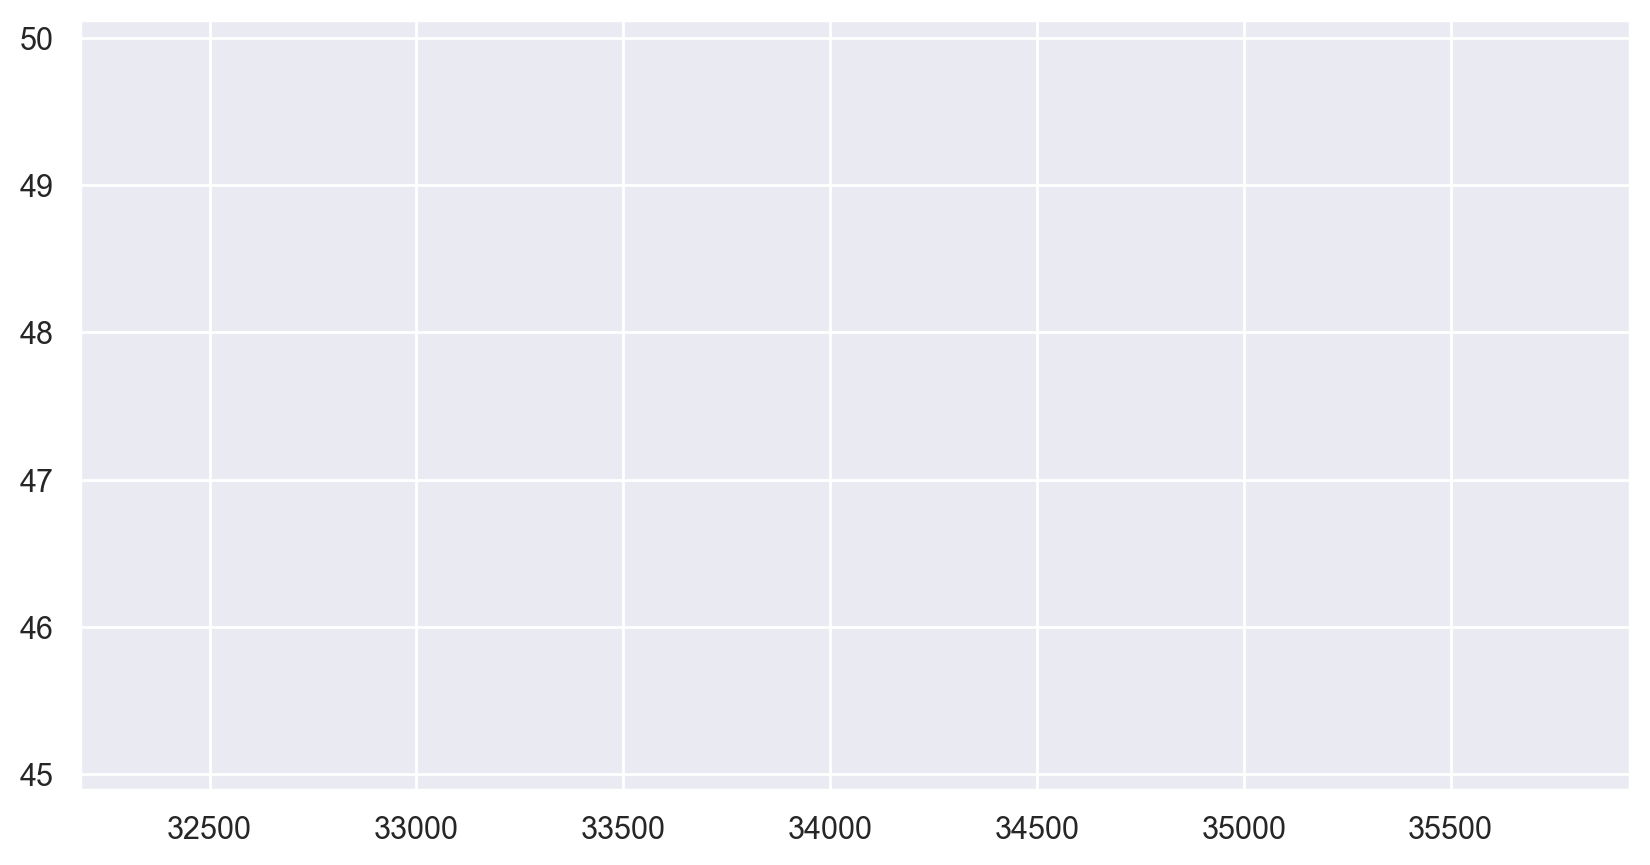

In [58]:
plt.plot(mod1_fit.forecast())
# plt.plot(mod2_fit.predict(start=0,end = 719)*40)
# plt.plot(mod3_fit.predict(start=0,end = 719))
plt.show()

In [36]:
len_pval_a = len(X_train_a.columns)
train_a_red = train_a["pv_measurement"].reset_index(drop=True)
columns_to_include_a = X_train_a.columns
while (len_pval_a != 0):
    X_train_a_red = X_train_a[columns_to_include_a].reset_index(drop=True)
    model_a = SARIMAX(endog = train_a_red, exog = X_train_a_red, order = (1,0,0))
    model_a_fit = model_a.fit()
    pval_a = model_a_fit.pvalues
    pval_a = pval_a[:(len(pval_a) - 2)]
    pval_a_index_remove = pval_a[pval_a > 0.05].index
    len_pval_a = len(pval_a_index_remove)
    if len_pval_a >= 1: 
        columns_to_include_a = columns_to_include_a.drop(columns_to_include_a[columns_to_include_a.get_indexer(pval_a_index_remove)])
        if len_pval_a == 0:
            columns_to_include_a = columns_to_include_a.drop(columns_to_include_a[columns_to_include_a.get_loc(pval_a_index_remove)])

In [290]:
model_a_fit.predict(start = 0, end = 2, typ = "levels", exog = X_test_a[columns_to_include_a])

0   -78.214921
1   -20.771471
2     0.854973
Name: predicted_mean, dtype: float64

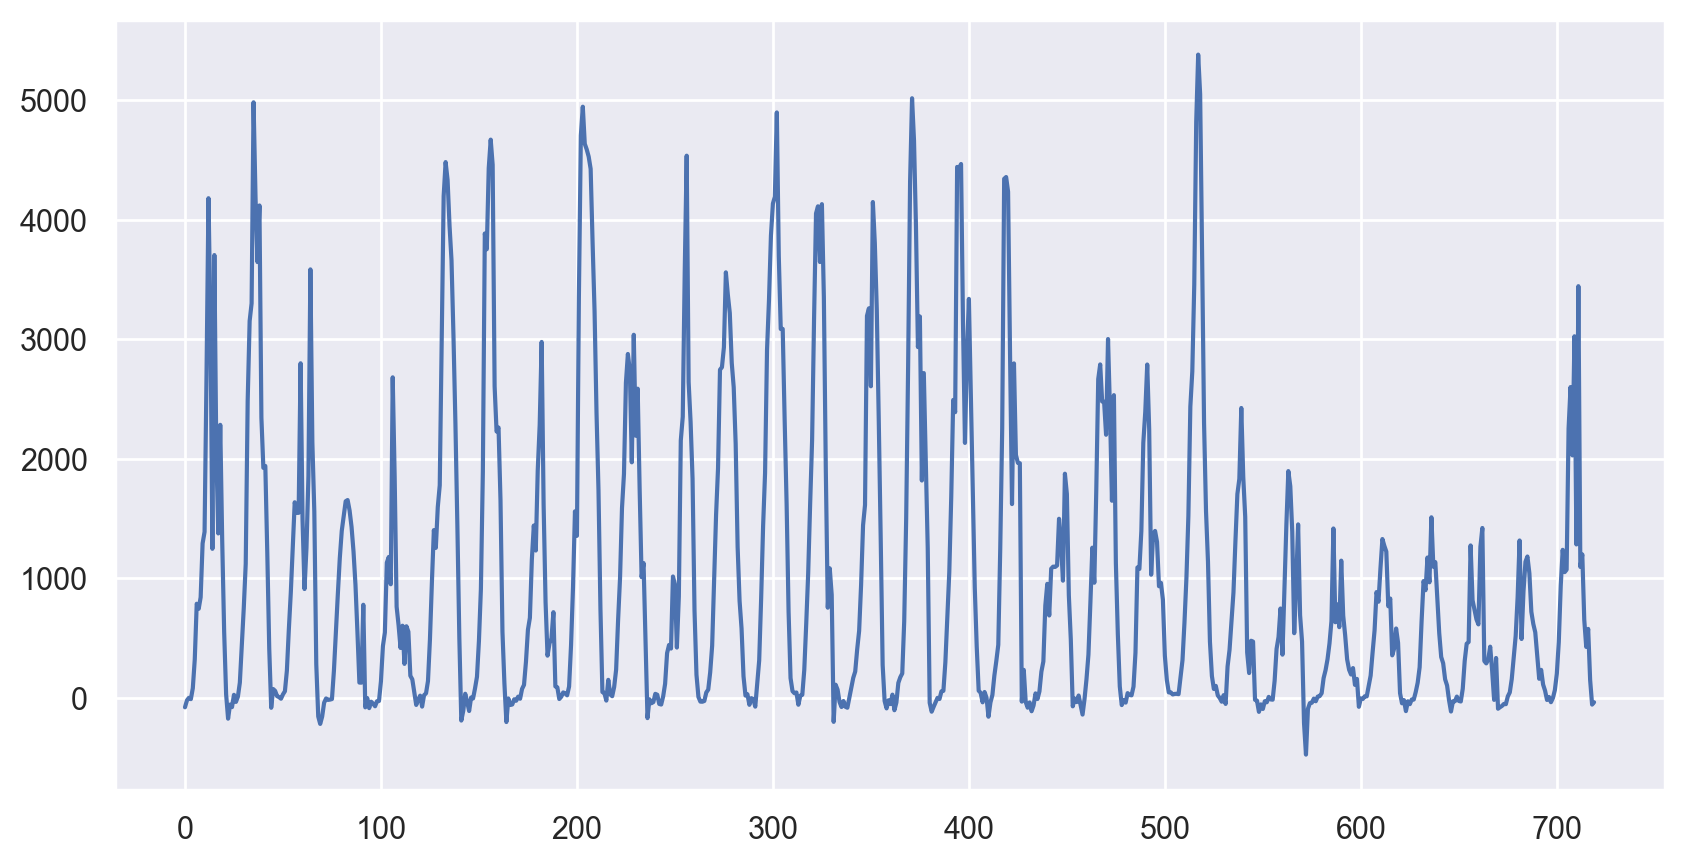

In [266]:
plt.plot(model_a_fit.predict(start = 0, end = 720-1, typ = "levels", exog = X_test_a[columns_to_include_a]))
plt.show()

In [241]:
len_pval_b = len(X_train_b.columns)
train_b_red = train_b["pv_measurement"].reset_index(drop=True)
columns_to_include_b = X_train_b.columns
while (len_pval_b != 0):
    X_train_b_red = X_train_b[columns_to_include_b].reset_index(drop=True)
    model_b = SARIMAX(endog = train_b_red, exog = X_train_b_red, order = (1,0,0))
    model_b_fit = model_b.fit()
    pval_b = model_b_fit.pvalues
    pval_b = pval_b[:(len(pval_b) - 2)]
    pval_b_index_remove = pval_b[pval_b > 0.05].index
    len_pval_b = len(pval_b_index_remove)
    if len_pval_b >= 1: 
        columns_to_include_b = columns_to_include_b.drop(columns_to_include_b[columns_to_include_b.get_indexer(pval_b_index_remove)])
        if len_pval_b == 0:
            columns_to_include_b = columns_to_include_b.drop(columns_to_include_b[columns_to_include_b.get_loc(pval_b_index_remove)])

In [243]:
len_pval_c = len(X_train_c.columns)
train_c_red = train_c["pv_measurement"].reset_index(drop=True)
columns_to_include_c = X_train_c.columns
while (len_pval_c != 0):
    X_train_c_red = X_train_c[columns_to_include_c].reset_index(drop=True)
    model_c = SARIMAX(endog = train_c_red, exog = X_train_c_red, order = (1,0,0))
    model_c_fit = model_c.fit()
    pval_c = model_c_fit.pvalues
    pval_c = pval_c[:(len(pval_c) - 2)]
    pval_c_index_remove = pval_c[pval_c > 0.05].index
    len_pval_c = len(pval_c_index_remove)
    if len_pval_c >= 1: 
        columns_to_include_c = columns_to_include_c.drop(columns_to_include_c[columns_to_include_c.get_indexer(pval_c_index_remove)])
        if len_pval_c == 0:
            columns_to_include_c = columns_to_include_c.drop(columns_to_include_c[columns_to_include_c.get_loc(pval_c_index_remove)])

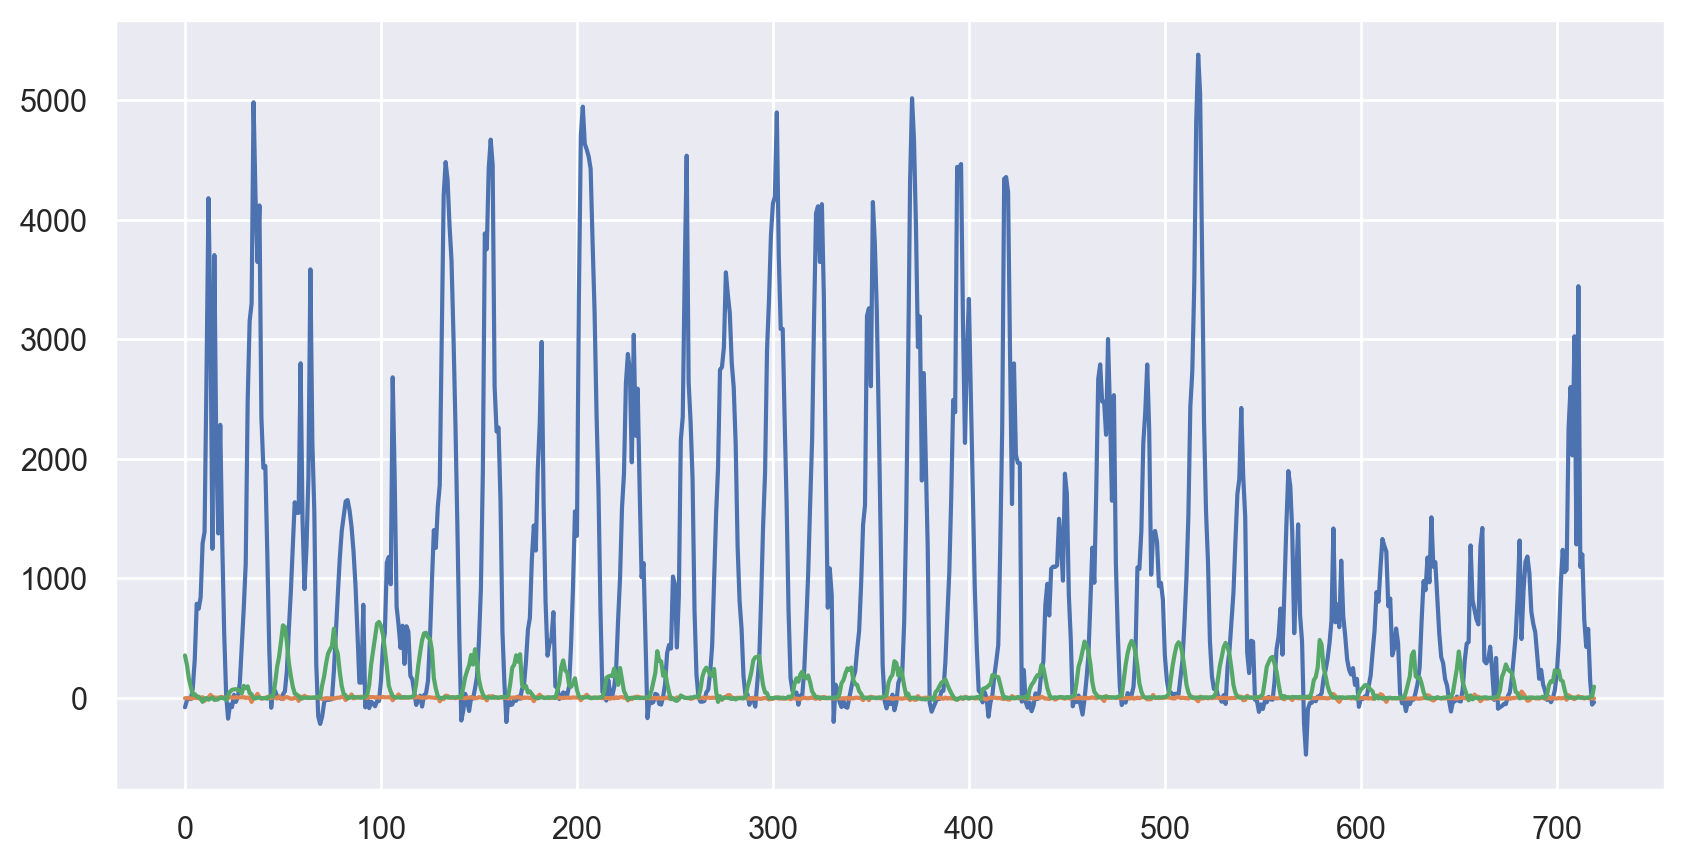

In [247]:
plt.plot(model_a_fit.predict(start = 0, end = 719, exog = X_test_a[columns_to_include_a]))
plt.plot(model_b_fit.predict(start = 0, end = 719, exog = X_test_b[columns_to_include_b]))
plt.plot(model_c_fit.predict(start = 0, end = 719, exog = X_test_c[columns_to_include_c]))
plt.show()

In [179]:
columns_to_include_a = X_train_a.columns.drop(X_train_a.columns[[2,4,7,9,11,12,13,14,15,16,17,18,23,24,25,26,28,29,30]])
train_a_red = train_a["pv_measurement"].reset_index(drop=True)
X_train_a_red = X_train_a[columns_to_include_a].reset_index(drop=True)
model_a = SARIMAX(endog = train_a_red, exog = X_train_a_red, order = (1,0,0))
model_a_fit = model_a.fit()
model_a_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:         pv_measurement   No. Observations:                34061
Model:               SARIMAX(1, 0, 0)   Log Likelihood             -247857.240
Date:                Mon, 02 Oct 2023   AIC                         495778.480
Time:                        13:20:28   BIC                         496048.429
Sample:                             0   HQIC                        495864.576
                              - 34061                                         
Covariance Type:                  opg                                         
===================================================================================================
                                      coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------------------
absolute_humidity_2m__gm3         -67.9432      9.374     -7.248      0.000     -86.317     -49.570
air_density_2m__kgm3            -7751.2548   1101.380     -7.038      0.000   -9909.919   -5592.590
clear_sky_rad__W                    2.0024      0.133     15.076      0.000       1.742       2.263
dew_point_2m__K                    44.7947      8.601      5.208      0.000      27.937      61.652
diffuse_rad__W                      2.2350      0.116     19.326      0.000       2.008       2.462
direct_rad__W                       4.1527      0.051     81.061      0.000       4.052       4.253
effective_cloud_cover__p           -1.6592      0.431     -3.853      0.000      -2.503      -0.815
msl_pressure__hPa                 211.7457     47.288      4.478      0.000     119.063     304.428
precip_5min__mm                  -324.9088     90.132     -3.605      0.000    -501.564    -148.254
precip_type_5min__idx             -59.3385     11.872     -4.998      0.000     -82.606     -36.071
pressure_100m__hPa               -558.4891     89.392     -6.248      0.000    -733.694    -383.285
pressure_50m__hPa                 -90.8483     91.106     -0.997      0.319    -269.413      87.716
prob_rime__p                        0.0845      4.056      0.021      0.983      -7.866       8.035
rain_water__kgm2                   79.0803    137.025      0.577      0.564    -189.483     347.644
relative_humidity_1000hPa__p       -2.3283      1.597     -1.458      0.145      -5.458       0.801
sfc_pressure__hPa                 438.7379     91.985      4.770      0.000     258.451     619.025
snow_depth__cm                     -6.2251     33.260     -0.187      0.852     -71.414      58.964
snow_drift__idx                  2.176e-09        nan        nan        nan         nan         nan
snow_melt_10min__mm             -1146.7169   2309.353     -0.497      0.620   -5672.966    3379.533
snow_water__kgm2                  -18.5663     32.370     -0.574      0.566     -82.010      44.878
sun_azimuth__d                     -0.0331      0.157     -0.211      0.833      -0.340       0.274
sun_elevation__d                   -0.2274      2.259     -0.101      0.920      -4.655       4.200
super_cooled_liquid_water__kgm2   236.5097     54.514      4.339      0.000     129.664     343.355
t_1000hPa__K                      -38.0516      6.741     -5.645      0.000     -51.264     -24.839
total_cloud_cover__p                0.3512      0.360      0.975      0.330      -0.355       1.057
visibility__m                       0.0016      0.000      4.210      0.000       0.001       0.002
wind_speed_10m__ms                -16.6286      3.512     -4.735      0.000     -23.512      -9.745
wind_speed_u_10m__ms               -9.7453      2.649     -3.679      0.000     -14.938      -4.553
wind_speed_v_10m__ms               15.2168      2.939      5.177      0.000       9.456      20.978
wind_speed_w_1000hPa__ms        -1747.031

In [81]:
columns_to_include_b = X_train_b.columns[[0,1,3,6,8,18,19]]
model_b = SARIMAX(train_b["pv_measurement"].reset_index(drop=True), exog = X_train_b.reset_index(drop=True), order = (1,0,0))
model_b_fit = model_b.fit()
model_b_fit.summary()

In [84]:
columns_to_include_c = X_train_c.columns[[0,1,3,6,8,18,19]]
model_c = SARIMAX(train_c["pv_measurement"].reset_index(drop=True), exog = X_train_c.reset_index(drop=True), order = (1,0,0))
model_c_fit = model_c.fit()
model_c_fit.summary()

In [144]:
pred_a = model_a_fit.predict(start = 0, end = 720-1, type = "levels", exog = X_test_a.reset_index(drop=True))
pred_b = model_b_fit.predict(start = 0, end = 720-1, type = "levels", exog = X_test_b.reset_index(drop=True))
pred_c = model_c_fit.predict(start = 0, end = 720-1, type = "levels", exog = X_test_c.reset_index(drop=True))

In [145]:
pred = pd.concat([pred_a, pred_b, pred_c], ignore_index=True)
pred[pred < 0] = 0
pred.index.name = "id"

In [149]:
train_b["pv_measurement"]

time
2019-01-01 00:00:00    0.000000
2019-01-01 01:00:00    0.000000
2019-01-01 02:00:00    0.000000
2019-01-01 03:00:00    0.000000
2019-01-01 04:00:00    0.000000
                         ...   
2023-04-30 19:00:00    0.828587
2023-04-30 20:00:00    0.000000
2023-04-30 21:00:00    0.000000
2023-04-30 22:00:00    0.000000
2023-04-30 23:00:00    0.000000
Name: pv_measurement, Length: 32819, dtype: float64

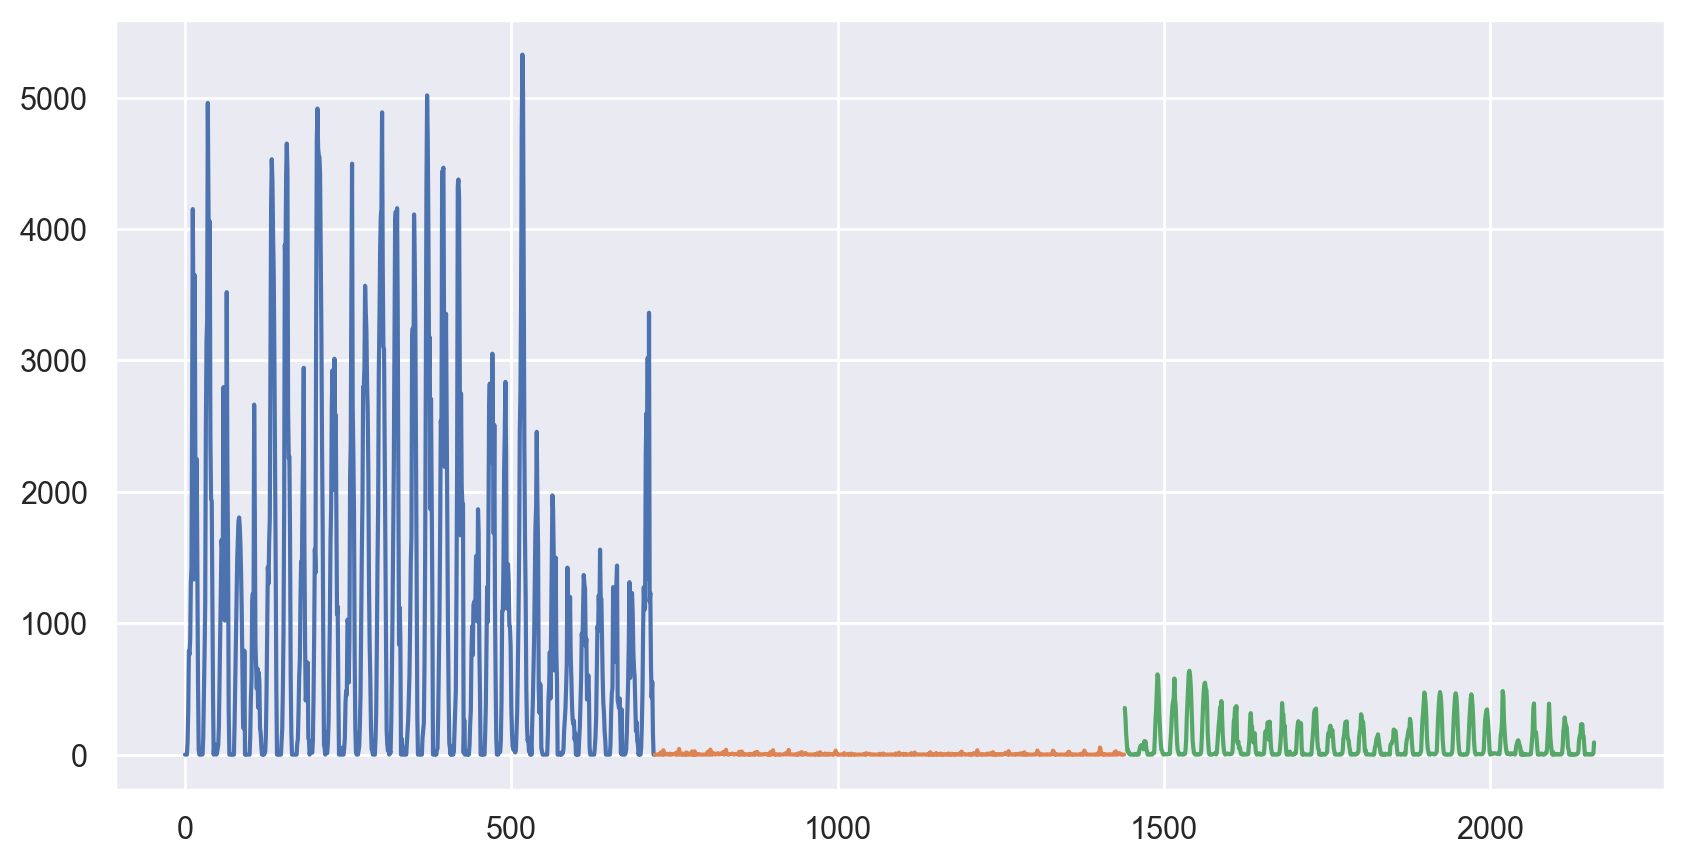

In [146]:
plt.plot(pred[0:720])
plt.plot(pred[720:(720*2)])
plt.plot(pred[(720*2):])
plt.show()